# Multi-label fine-tuned ClinicalBert

#### Necessary Imports
Please use:  
pip install pandas, tensorflow, transformers, numpy, nltk, matplotlib  
If you do not have any of the packages

In [12]:
import utils
import model_helpers
import pickle
LABELS = ["ABDOMINAL",
        "ADVANCED-CAD",
        "ALCOHOL-ABUSE",
        "ASP-FOR-MI",
        "CREATININE",
        "DIETSUPP-2MOS",
        "DRUG-ABUSE",
        "ENGLISH",
        "HBA1C",
        "KETO-1YR",
        "MAJOR-DIABETES",
        "MAKES-DECISIONS",
        "MI-6MOS"]


### Retrieving Data

In [13]:
# Both will be dataframes with a 'notes' column and a column for each label
train_data = utils.get_note_data(LABELS, folder_name='train')
test_data = utils.get_note_data(LABELS, folder_name='test')

## Quick Data Exploration

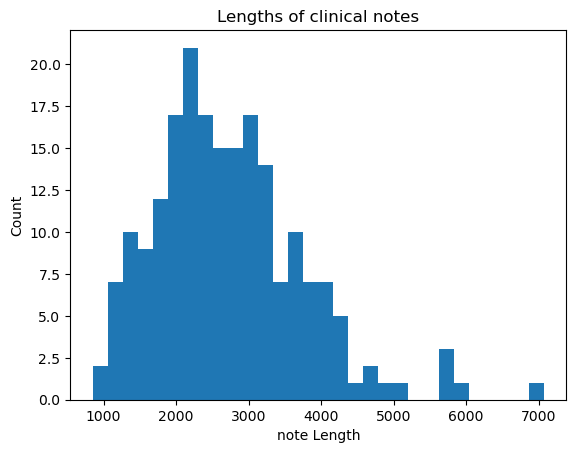

In [15]:
utils.display_histogram(train_data)

Note that these are much too long to pass into BERT, which has a max_token count of 512. We trim them inside the functions to make the models.

### Making the models

In [6]:
model, history = model_helpers.create_multi_label(train_data, num_epochs=20, save=True)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


7/7 [==============================] - 193s 26s/step - loss: 3.0742 - accuracy: 0.0099 - lr: 0.0010


### Hyperparameter Tuning

__The history was saved so that the hyper-parameter tuning need not be done again.__

In [ ]:
# TODO: DeleTE

# Save history to a pickle file
with open(f'overall_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
# Load history from the pickle file
with open(f'overall_history.pkl', 'rb') as file:
    history = pickle.load(file)


30


KeyError: 'accuracy'

As seen above, the training loss plateaus around 10 epochs, and the validation_loss and validation_accuracy never particularly improved. Thus, 10 epochs was selected in order to not overfit.

In [ ]:
utils.make_history_graph(history)

### Evaluating the Model

In [5]:
predictions = model_helpers.get_predictions(model, test_data)
label_to_predictions = {}
# Simple column extraction to format correclty for helper function in next cell
for label, column in zip(LABELS, range(predictions.shape[1])):
    column_values = predictions[:, column]
    label_to_predictions[label] = column_values

NameError: name 'test_data' is not defined

Save predictions and load predictions here if wanted.

In [ ]:
utils.save_preds(label_to_predictions, "individual_models_predicitions")

In [ ]:
label_to_predictions = utils.read_preds("individual_models_predicitions")

C:\Users\nlabu\AppData\Local\Temp\ipykernel_12508\2251726497.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_to_predictions[row[0]] = list(row[1:])


### Performance:

In [13]:
label_to_micro_f1, overall_f1 = utils.get_f1_scores_for_labels(LABELS, test_data, label_to_predictions)
print('overall-f1:', overall_f1)

Raw f1 for ABDOMINAL 0.18023255813953487
Raw f1 for ADVANCED-CAD 0.1313131313131313
Raw f1 for ALCOHOL-ABUSE 0.48809523809523814
Raw f1 for ASP-FOR-MI 0.4476744186046512
Raw f1 for CREATININE 0.381294964028777
Raw f1 for DIETSUPP-2MOS 0.7235294117647059
Raw f1 for DRUG-ABUSE 0.4787878787878788
Raw f1 for ENGLISH 0.48255813953488375
Raw f1 for HBA1C 0.1511627906976744
Raw f1 for KETO-1YR 0.5
Raw f1 for MAJOR-DIABETES 0.26744186046511625
Raw f1 for MAKES-DECISIONS 0.4883720930232558
Raw f1 for MI-6MOS 0.46249999999999997
overall-f1: 0.39868942188114215


# Individual fine-tuned ClinicalBert (one for each label)

### Retrieving Data

In [2]:
# Both will be dataframes with a 'notes' column and a column for each label
train_data = utils.get_note_data(LABELS, folder_name='train')
test_data = utils.get_note_data(LABELS, folder_name='test')

### Making the models

In [3]:
# Make the models
# 10 Epochs chosen from hyperparameter tuning below
models = model_helpers.for_passed_labels(LABELS, train_data, epochs=10, verbose=True)

c:\Users\nlabu\anaconda3\envs\tfenv\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
Some layers from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT.
If your task is similar to the

Epoch 1/15
7/7 [==============================] - 280s 40s/step - loss: 2.4913 - accuracy: 0.4802 - val_loss: 0.6461 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 2/15
7/7 [==============================] - 283s 42s/step - loss: 1.4205 - accuracy: 0.5842 - val_loss: 0.7376 - val_accuracy: 0.3488 - lr: 0.0010
Epoch 3/15
7/7 [==============================] - 327s 49s/step - loss: 1.3990 - accuracy: 0.5545 - val_loss: 0.6875 - val_accuracy: 0.5814 - lr: 0.0010
Epoch 4/15
7/7 [==============================] - 301s 45s/step - loss: 1.3702 - accuracy: 0.5941 - val_loss: 0.7105 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/15
7/7 [==============================] - 339s 44s/step - loss: 1.3419 - accuracy: 0.6188 - val_loss: 0.8226 - val_accuracy: 0.3837 - lr: 0.0010
Epoch 6/15
7/7 [==============================] - 346s 53s/step - loss: 1.3858 - accuracy: 0.4356 - val_loss: 0.6573 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 7/15
7/7 [==============================] - 269s 40s/step - loss: 1.3314 - a

Some layers from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
7/7 [==============================] - 321s 46s/step - loss: 3.1462 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 2/15
7/7 [==============================] - 314s 46s/step - loss: 1.3901 - accuracy: 0.4802 - val_loss: 0.7731 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 3/15
7/7 [==============================] - 345s 50s/step - loss: 1.4260 - accuracy: 0.5594 - val_loss: 0.7001 - val_accuracy: 0.4767 - lr: 0.0010
Epoch 4/15
7/7 [==============================] - 310s 46s/step - loss: 1.3907 - accuracy: 0.4356 - val_loss: 0.6925 - val_accuracy: 0.5698 - lr: 0.0010
Epoch 5/15
7/7 [==============================] - 299s 43s/step - loss: 1.3844 - accuracy: 0.5693 - val_loss: 0.6924 - val_accuracy: 0.5930 - lr: 1.0000e-04
Epoch 6/15
7/7 [==============================] - 295s 43s/step - loss: 1.3841 - accuracy: 0.6535 - val_loss: 0.6919 - val_accuracy: 0.4884 - lr: 1.0000e-04
Epoch 7/15
7/7 [==============================] - 305s 45s/step - loss: 1.

### Hyperparameter Tuning

The following code was used to perform hyperparameter tuning:
```python
# Example usage of hyperparameter tuning:
models, histories = model_helpers.for_passed_labels(['ABDOMINAL', 'ADVANCED-CAD'], train_data, test_data=test_data, epochs=15, return_history=True)
```
This gives histories for up to 15 epochs with validation data for ABDOMINAL and ADVANCED-CAD. A trend was already apparent for these two labels, so only these two labels were done (took ~2.5 hours just for these two, so would've been over 12 hours for all of them).  
__These histories were saved so that the hyper-parameter tuning need not be done again.__

In [16]:
# TODO: Create graph for hyperparameter tuning for both labels
new_histories = {}
# Load history from the pickle file
for label in ['ABDOMINAL', 'ADVANCED-CAD']:
    with open(f'{label}_history.pkl', 'rb') as file:
        new_histories[label] = pickle.load(file)


As seen above, the training loss plateaus around 10 epochs, and the validation_loss and validation_accuracy never particularly improved. Thus, 10 epochs was selected in order to not overfit.

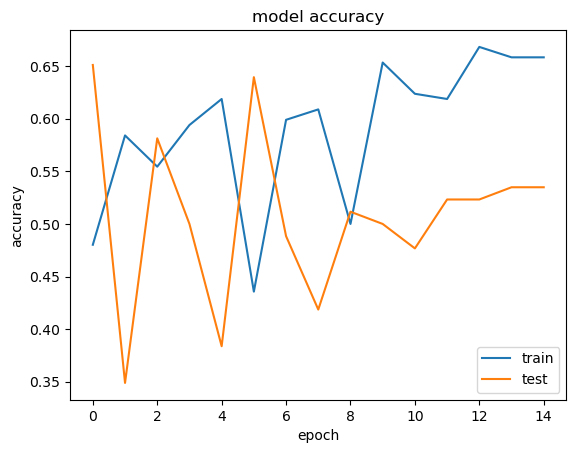

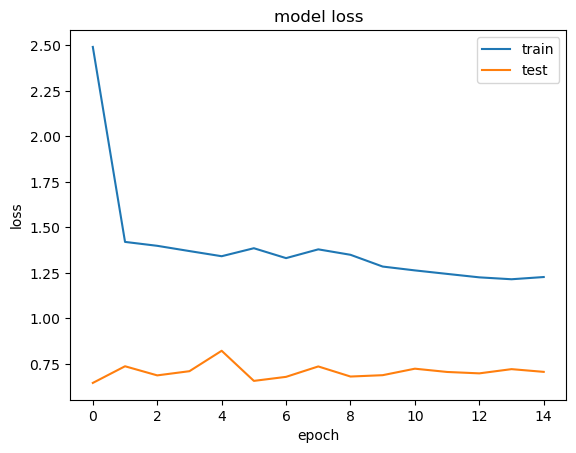

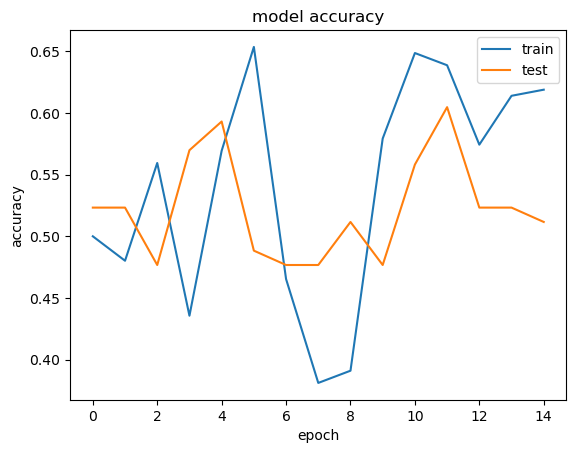

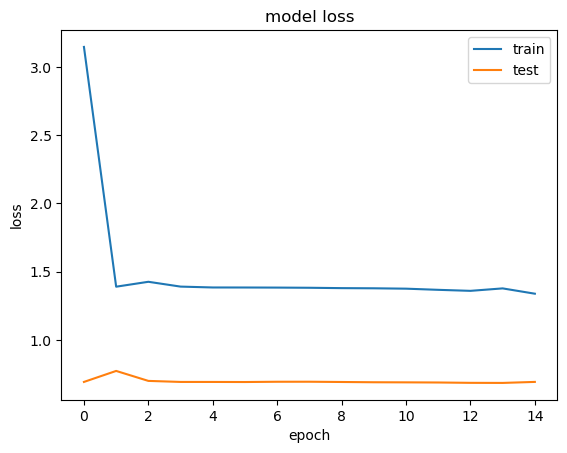

In [17]:
for label, history in new_histories.items():
    utils.make_history_graph(history)

### Evaluating the Models

In [ ]:
# Example getting predictions:
label_to_predictions = {}
for label, model in models:
    print(f"Predicting for model: {label}")
    label_to_predictions[label] = model_helpers.get_predictions(model, test_data)


Predicting for model: ALCOHOL-ABUSE
3/3 [==============================] - 31s 10s/step
Predicting for model: KETO-1YR
3/3 [==============================] - 38s 12s/step
Predicting for model: MAJOR-DIABETES
3/3 [==============================] - 37s 12s/step


Save predictions and load predictions here if wanted.

In [ ]:
utils.save_preds(label_to_predictions, "individual_models_predicitions")

In [ ]:
label_to_predictions = utils.read_preds("individual_models_predicitions")

C:\Users\nlabu\AppData\Local\Temp\ipykernel_12508\2251726497.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_to_predictions[row[0]] = list(row[1:])


### Performance:

In [ ]:
label_to_micro_f1, overall_f1 = utils.get_f1_scores_for_labels(LABELS, test_data, label_to_predictions)
print('overall-f1:', overall_f1)

overall-f1: nan


c:\Users\nlabu\anaconda3\envs\tfenv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nlabu\anaconda3\envs\tfenv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
